In [2]:
import numpy as np
from knn import KNN
from collections import Counter

In [3]:
def euclidean_distance(x1, x2):
    distance = np.sqrt(np.sum((x1-x2)**2))
    return distance

In [4]:
class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return predictions  
    
    def _predict(self, x):
        #compute the distance
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]

        #get the closest k
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        #majority voye
        most_common = Counter(k_nearest_labels).most_common()
        return most_common[0][0]

In [5]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
#from KNN import KNN 

In [6]:
cmap = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

In [7]:
iris = datasets.load_iris()
X, y = iris.data, iris.target

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

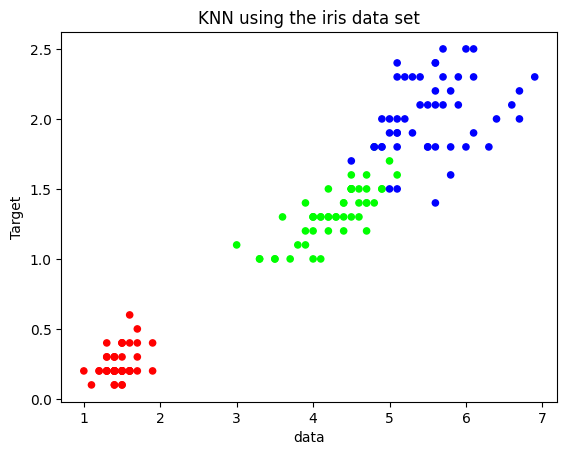

In [13]:
plt.figure()
# plt.scatter(X[:,2], X[:,3], c=y, cmap=cmap, s=20)
# plt.show()
plt.xlabel("data")
plt.ylabel("Target")
plt.title("KNN using the iris data set")
plt.scatter(X[:,2], X[:,3], c=y, cmap=cmap, s=20)
plt.show()

In [10]:

clf = KNN(k=5)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

In [11]:
print(predictions)

[np.int64(1), np.int64(2), np.int64(2), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(2), np.int64(1), np.int64(0), np.int64(2), np.int64(1), np.int64(0), np.int64(1), np.int64(2), np.int64(0), np.int64(2), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(2), np.int64(0), np.int64(2), np.int64(1), np.int64(2), np.int64(0)]


In [12]:
acc = np.sum(predictions == y_test) / len(y_test)
print("Accuracy = ",acc)

Accuracy =  0.9666666666666667
